1. [Introduzione](#introduction)

2. [Data Cleaning & Data Manipulation](#data_clean_man)

3. [EDA](#eda) 

    - [Analisi generali](#general)
    - [Relazioni con la famiglia](#family_rel)
    - [Relazioni con le istituzioni educative](#school_rel)
    - [Gestione del tempo](#time_mng)
    - [Conclusioni](#conclusions)

4. [Analisi Predittiva](#pred_ana)

    - [Random Forest (obbl)](#random_forest)
    - [Support Vector Regression (obbl)](#SVR)
    - [Logistic Regression (opz.)](#log_reg)
    - [KNN (opz.)](#KNN)
    - [Confronto](#comparison)


[Help](https://www.kaggle.com/code/akerineth/notebook762a532494)

In [1]:
#import library 

#! pip install graphviz

import pandas as pd
import numpy as np

from io import StringIO

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from graphviz import Digraph
from IPython.display import display

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

<h1 id="introduction"> Introduzione </h1>

<b>SCALETTA: TO DELETE</b>
Visualizzazione dei dati tramite shape, info, description

Analisi descrittiva su:

<ul>
    <li>Cosa sto analizzando?</li>
    <li>Come posso scomporre il problema?</li>
    <li>Cosa mi aspetto di trovare? Da ogni sotto problema?</li>
</ul>

<b>END TO DELETE</b>

In [2]:
mat = pd.read_csv('dataset/dataset/student-mat.csv')
por = pd.read_csv('dataset/dataset/student-por.csv')

Questo progetto si articola in 2 parti:
<ul>
<li>una prima parte è volta ad analizzare il consumo di alcolici nei giovani, prendendo ad esame un <a href="https://www.kaggle.com/datasets/uciml/student-alcohol-consumption">dataset</a> di studenti della scuola secondaria (15-22 anni), cercando di capire se e quali possono essere le sottoaree su cui intervenire.</li>
<li>successivamente, si procederà, usando lo stesso dataset, ad un'analisi predittiva sul voto finale di uno studente, utilizzando differenti algoritmi di ML e mettendoli a confronto.</li>
</ul>

### Dataset Analysis


Il dataset selezionato, ha messo a disposizione le seguenti colonne:

In [3]:
mat.columns.values

array(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu',
       'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime',
       'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic',
       'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences', 'G1', 'G2', 'G3'], dtype=object)

Dove: 
<ul>
<li><b>school</b>:  student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)</li>
<li><b>sex</b>: student's sex (binary: 'F' - female or 'M' - male)</li>
<li><b>age</b>: student's age (numeric: from 15 to 22)</li>
<li><b>address</b>: student's home address type (binary: 'U' - urban or 'R' - rural)</li>
<li><b>famsize</b>: family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)</li>
<li><b>Pstatus</b>: parent's cohabitation status (binary: 'T' - living together or 'A' - apart)</li>
<li><b>Medu</b>: mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)</li>
<li><b>Fedu</b>: Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)</li>
<li><b>Mjob</b>: Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')</li>
<li><b>Fjob</b>: Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')</li>
<li><b>reason</b>: reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')</li>
<li><b>guardian</b>: guardian - student's guardian (nominal: 'mother', 'father' or 'other')</li>
<li><b>traveltime</b>: traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)</li>
<li><b>studytime</b>: studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)</li>
<li><b>failures</b>: number of past class failures (numeric: n if 1<=n<3, else 4)</li>
<li><b>schoolsup</b>: extra educational support (binary: yes or no)</li>
<li><b>famsup</b>: family educational support (binary: yes or no)</li>
<li><b>paid</b>: extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)</li>
<li><b>activities</b>: extra-curricular activities (binary: yes or no)</li>
<li><b>nursery</b>: attended nursery school (binary: yes or no)</li>
<li><b>higher</b>: wants to take higher education (binary: yes or no)</li>
<li><b>internet</b>: Internet access at home (binary: yes or no)</li>
<li><b>romantic</b>: with a romantic relationship (binary: yes or no)</li>
<li><b>famrel</b>: quality of family relationships (numeric: from 1 - very bad to 5 - excellent)</li>
<li><b>freetime</b>: free time after school (numeric: from 1 - very low to 5 - very high)</li>
<li><b>goout</b>: going out with friends (numeric: from 1 - very low to 5 - very high)</li>
<li><b>Dalc</b>: workday alcohol consumption (numeric: from 1 - very low to 5 - very high)</li>
<li><b>Walc</b>: weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)</li>
<li><b>health</b>: current health status (numeric: from 1 - very bad to 5 - very good)</li>
<li><b>absences</b>: number of school absences (numeric: from 0 to 93)</li>

<li><b>G1</b>: first period grade (numeric: from 0 to 20)</li>
<li><b>G2</b>: second period grade (numeric: from 0 to 20)</li>
<li><b>G3</b>: final grade (numeric: from 0 to 20, output target)</li>

</ul>

<h1 id="data_clean_man"> Data Cleaning & Manipulation </h1>

In [4]:
#Join Dataset Analysis

print('por.shape: ', por.shape)
print('mat.shape: ', mat.shape)

por.shape:  (649, 33)
mat.shape:  (395, 33)


In [5]:
por.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [6]:
mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [7]:
print('Numero di righe duplicate per dataset')
print('Por: ', len(por[por.duplicated()]))
print('Mat', len(mat[mat.duplicated()]))

Numero di righe duplicate per dataset
Por:  0
Mat 0


In [8]:
mat['course'] = 'MT'
por['course'] = 'PR'
full_df = pd.concat([por, mat])

full_df = full_df.reset_index(drop=True)

In [9]:
#controllo che anche dopo l'unione, non ci siano righe duplicate, escludendo la colonna course dalla ricerca
full_df[full_df.duplicated(subset=full_df.columns.difference(['course']))]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,course


In [10]:
# Ove possibile, vengono trasformate le variabili non numeriche in variabili numeriche

In [11]:
full_df_original = full_df.copy()

In [12]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

In [13]:
''' 
Leggo le variabili categoriche e le divido in binarie e non, 
in modo da poter successivamente effettuare una codifica con LabelEncoder nel primo caso e OneHotEncoder nel secondo caso
'''

categorical_columns = full_df.select_dtypes(exclude=['number']).columns

categorical_binary_columns = []
categorical_not_binary_columns = []


for col in categorical_columns:
        if full_df.nunique()[col] == 2:
                categorical_binary_columns.append(col)
        else:
               categorical_not_binary_columns.append(col)


In [14]:
label_encoders = {}
onehot_encoders = {}
mapping = {}  # Dizionario per il mapping di LabelEncoder

In [15]:
# Codifica delle variabili non binarie con OneHotEncoder e aggiornamento del mapping
for col in categorical_not_binary_columns:
    # Configura OneHotEncoder per la colonna corrente
    onehot_encoders[col] = OneHotEncoder(categories='auto', drop='if_binary')
    
    # Adatta OneHotEncoder alla colonna e trasforma i dati
    encoded_values = onehot_encoders[col].fit_transform(full_df[[col]])
    
    # Converti i risultati in un DataFrame e concatena con full_df
    encoded_df = pd.DataFrame(encoded_values.toarray(), columns=onehot_encoders[col].get_feature_names_out([col]))
    full_df = pd.concat([full_df, encoded_df], axis=1)
    
    # Aggiorna il mapping
    mapping[col] = {i: cat for i, cat in enumerate(onehot_encoders[col].categories_[0])}
    
    # Droppa la colonna originale dopo la codifica
    full_df.drop(columns=[col], inplace=True)

# Codifica delle variabili binarie con LabelEncoder e aggiornamento del mapping
for col in categorical_binary_columns:
    label_encoders[col] = LabelEncoder()
    full_df[col] = label_encoders[col].fit_transform(full_df[col])
    
    # Aggiorna il mapping
    mapping[col] = {i: cat for i, cat in enumerate(label_encoders[col].classes_)}


In [16]:
mapping

{'Mjob': {0: 'at_home', 1: 'health', 2: 'other', 3: 'services', 4: 'teacher'},
 'Fjob': {0: 'at_home', 1: 'health', 2: 'other', 3: 'services', 4: 'teacher'},
 'reason': {0: 'course', 1: 'home', 2: 'other', 3: 'reputation'},
 'guardian': {0: 'father', 1: 'mother', 2: 'other'},
 'school': {0: 'GP', 1: 'MS'},
 'sex': {0: 'F', 1: 'M'},
 'address': {0: 'R', 1: 'U'},
 'famsize': {0: 'GT3', 1: 'LE3'},
 'Pstatus': {0: 'A', 1: 'T'},
 'schoolsup': {0: 'no', 1: 'yes'},
 'famsup': {0: 'no', 1: 'yes'},
 'paid': {0: 'no', 1: 'yes'},
 'activities': {0: 'no', 1: 'yes'},
 'nursery': {0: 'no', 1: 'yes'},
 'higher': {0: 'no', 1: 'yes'},
 'internet': {0: 'no', 1: 'yes'},
 'romantic': {0: 'no', 1: 'yes'},
 'course': {0: 'MT', 1: 'PR'}}

In [17]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 47 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   school             1044 non-null   int64  
 1   sex                1044 non-null   int64  
 2   age                1044 non-null   int64  
 3   address            1044 non-null   int64  
 4   famsize            1044 non-null   int64  
 5   Pstatus            1044 non-null   int64  
 6   Medu               1044 non-null   int64  
 7   Fedu               1044 non-null   int64  
 8   traveltime         1044 non-null   int64  
 9   studytime          1044 non-null   int64  
 10  failures           1044 non-null   int64  
 11  schoolsup          1044 non-null   int64  
 12  famsup             1044 non-null   int64  
 13  paid               1044 non-null   int64  
 14  activities         1044 non-null   int64  
 15  nursery            1044 non-null   int64  
 16  higher             1044 

In [ ]:
general = ['school', 'sex', 'age', 'health']
family = ['famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'guardian', 'famsup', 'famrel']
school = ['failures', 'schoolsup', 'paid', 'activities', 'nursery', 'higher', 'absences']
time = ['traveltime', 'studytime', 'freetime', 'goout']

<h1 id="eda">EDA</h1>

<b>SCALETTA: TO DELETE</b>
Analisi esplorativa volta ad avere un focus sulle seguenti macroaree:
<ul>
    <li>Analisi Generale</li>
    <li>Relazioni con la famiglia</li>
    <li>Relazioni con la scuola</li>
    <li>Gestione del tempo</li>
</ul>
<b>END TO DELETE</b>

In [ ]:
# NB il parametro include='all' è stato inserito per scrupolo, 
# perché comunque il dataframe full_df è stato strutturato per avere al suo interno variabili numeriche
full_df.describe(include='all').T

Dopo una prima Analisi del dataset e data la moltitudine di dati forniti da esso, è stato deciso di scomporre il problema in sottocategorie, che potessero per quanto possibile, cercare di capire quale possa essere il rapporto degli adolescenti con l'alcol e soprattutto cercare di capire se i casi più critici possano essere ricondotti a una medesima causa.


Le macroaree individuate essere d'interesse sono:

<ul>
<li><b>Analisi generale</b>: finalizzata a dare una panoramica generale </li>
<li><b>Ruolo della famiglia</b>: analisi volta a individuare le criticità che possono esserci in ambito familiare</li>
<li><b>Rapporto con le autorità scolastiche</b>: volta a individuare le criticità che possono esserci in ambito scolastico</li>
<li><b>Impiego del tempo</b>: analisi volta a mettere in luce la gestione del tempo da parte dei giovani</li>
</ul>

In [18]:
dot = Digraph(comment='Diagramma a Blocchi')
dot.attr(splines='ortho', nodesep='0.2')

In [19]:
dot.node('A', 'Consumo di alcol [15-22]', shape='box', style='filled', color='lightgrey')

dot.node('B', 'Panoramica \ngenerale', shape='box', style='filled', color='lightblue')
dot.node('C', 'Relazioni \nfamiliari', shape='box', style='filled', color='lightblue')
dot.node('D', 'Relazioni \nscolastiche', shape='box', style='filled', color='lightblue')
dot.node('E', 'Gestione \ntempo', shape='box', style='filled', color='lightblue')

In [20]:
dot.edge('A', 'B')
dot.edge('A', 'C')
dot.edge('A', 'D')
dot.edge('A', 'E')

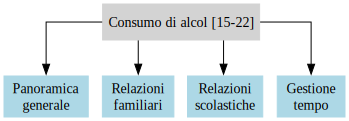

In [21]:
display(dot)

<h2 id="general">Panoramica Generale</h2>

Domande a cui rispondere:
- quando i giovani bevono maggiormente: durante la settimana o nel weekend?
- quanto il consumo di alcol incide sui risultati scolastici?
- relazione tra uso di alcol e sesso
- relazione tra uso di alcol ed età

### Weekly Alcohol Consumption

Il seguente grafico mostra la relazione tra il consumo di alcol tra i giovani, nei giorni lavorativi e nei weekend

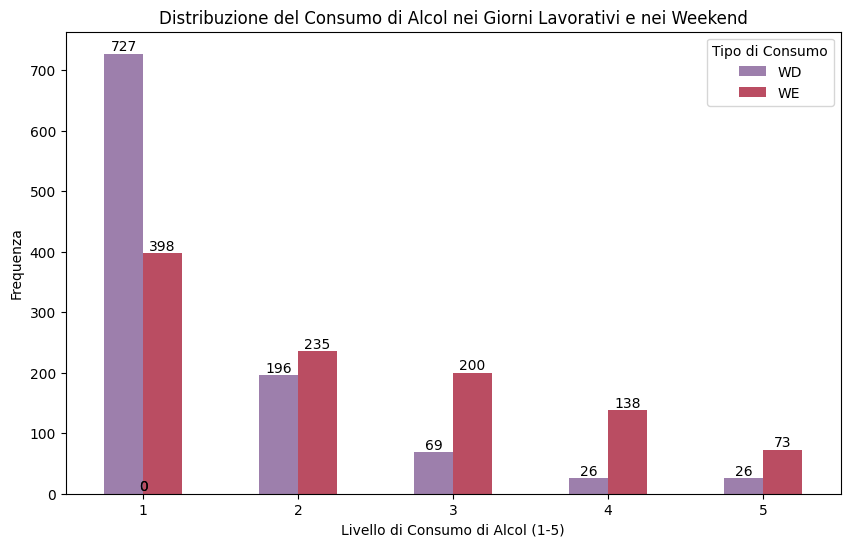

In [22]:
df_melted = full_df.melt(value_vars=['Dalc', 'Walc'], var_name='Alcohol_Consumption', value_name='Level')

# Definizione dei colori manualmente
colors = ['#A077b4', '#CC3B57']

# Creazione dell'istogramma a barre parallele
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_melted, x='Level', hue='Alcohol_Consumption', palette=colors, width=0.5)

# Aggiunta delle etichette di testo sulle barre
for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')
# Titolo e etichette degli assi
plt.title('Distribuzione del Consumo di Alcol nei Giorni Lavorativi e nei Weekend')
plt.xlabel('Livello di Consumo di Alcol (1-5)')
plt.ylabel('Frequenza')
plt.legend(title='Tipo di Consumo', labels=['WD', 'WE'])

# Mostra il grafico
plt.show()

Il seguente grafico mostra la differenza tra l'uso di alcol durante la settimana e durante il weekend.

In [23]:
full_df['Gap'] = (full_df['Walc'] - full_df['Dalc'])

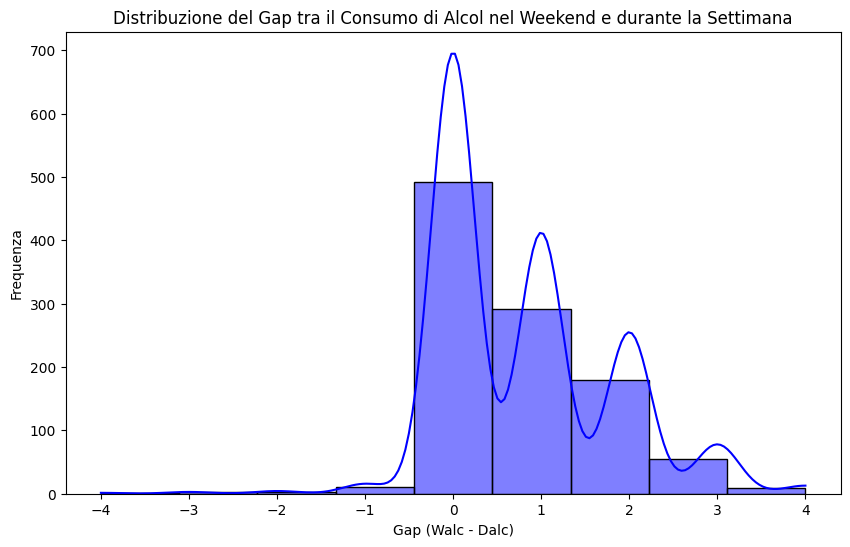

In [24]:
# Creazione dell'istogramma per visualizzare la distribuzione del gap
plt.figure(figsize=(10, 6))
sns.histplot(full_df['Gap'], bins=9, kde=True, color='blue')

# Titolo e etichette degli assi
plt.title('Distribuzione del Gap tra il Consumo di Alcol nel Weekend e durante la Settimana')
plt.xlabel('Gap (Walc - Dalc)')
plt.ylabel('Frequenza')

# Mostra il grafico
plt.show()


La distribuzione è massima sullo 0, ovvero non ci sono significative differenze tra il consumo d'alcol durante la settimana lavorativa e il weekend. 
I casi negativi [-4, -1] mettono in luce i casi in cui il consumo di alcolici durante la settimana è superiore a quello del fine settimana.
Al contrario, i casi positivi [1, 4], mettono in luce i casi in cui il consumo di alcolici durante il finesettimana è superiore rispetto a quello della settimana lavorativa.


### Alcohol consumption and academic achievement


In [25]:
# Calcolo della media di G3 per ogni livello di consumo di alcol in Dalc e Walc
dalc_mean_g3 = full_df.groupby('Dalc')['G3'].mean().reset_index()
walc_mean_g3 = full_df.groupby('Walc')['G3'].mean().reset_index()

In [26]:
# Calcolo della media di G3 per ogni livello di consumo di alcol in Dalc e Walc
dalc_mean_g3 = full_df.groupby('Dalc')['G3'].mean().reset_index()
walc_mean_g3 = full_df.groupby('Walc')['G3'].mean().reset_index()

# Rinominare le colonne per distinguere i due tipi di consumo
dalc_mean_g3.columns = ['alcohol_consumption', 'G3_mean_dalc']
walc_mean_g3.columns = ['alcohol_consumption', 'G3_mean_walc']

# Unire i due DataFrame per creare un unico DataFrame per la visualizzazione
mean_g3 = pd.merge(dalc_mean_g3, walc_mean_g3, on='alcohol_consumption')

In [27]:
mean_g3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   alcohol_consumption  5 non-null      int64  
 1   G3_mean_dalc         5 non-null      float64
 2   G3_mean_walc         5 non-null      float64
dtypes: float64(2), int64(1)
memory usage: 252.0 bytes


In [28]:
# Trasforma il dataframe in formato long
mean_g3_long = pd.melt(mean_g3, id_vars='alcohol_consumption', value_vars=['G3_mean_dalc', 'G3_mean_walc'], 
                       var_name='G3_type', value_name='mean_score')

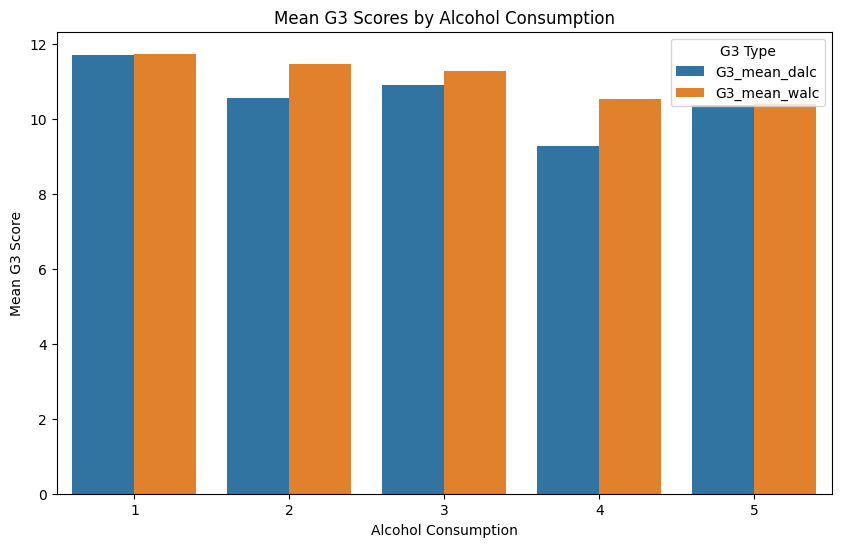

In [29]:

# Crea il grafico a barre parallele
plt.figure(figsize=(10, 6))
sns.barplot(data=mean_g3_long, x='alcohol_consumption', y='mean_score', hue='G3_type')

# Personalizza il grafico
plt.title('Mean G3 Scores by Alcohol Consumption')
plt.xlabel('Alcohol Consumption')
plt.ylabel('Mean G3 Score')
plt.legend(title='G3 Type')

# Mostra il grafico
plt.show()

### Alcohol consumption and sex


In [30]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 48 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   school             1044 non-null   int64  
 1   sex                1044 non-null   int64  
 2   age                1044 non-null   int64  
 3   address            1044 non-null   int64  
 4   famsize            1044 non-null   int64  
 5   Pstatus            1044 non-null   int64  
 6   Medu               1044 non-null   int64  
 7   Fedu               1044 non-null   int64  
 8   traveltime         1044 non-null   int64  
 9   studytime          1044 non-null   int64  
 10  failures           1044 non-null   int64  
 11  schoolsup          1044 non-null   int64  
 12  famsup             1044 non-null   int64  
 13  paid               1044 non-null   int64  
 14  activities         1044 non-null   int64  
 15  nursery            1044 non-null   int64  
 16  higher             1044 

In [31]:
# Calcolo della media di G3 per ogni livello di consumo di alcol in Dalc e Walc
dalc_mean_g3 = full_df.groupby('Dalc')['sex'].mean().reset_index()
walc_mean_g3 = full_df.groupby('Walc')['sex'].mean().reset_index()

# Rinominare le colonne per distinguere i due tipi di consumo
dalc_mean_g3.columns = ['alcohol_consumption', 'G3_mean_dalc']
walc_mean_g3.columns = ['alcohol_consumption', 'G3_mean_walc']

# Unire i due DataFrame per creare un unico DataFrame per la visualizzazione
mean_g3 = pd.merge(dalc_mean_g3, walc_mean_g3, on='alcohol_consumption')

In [ ]:
mapping

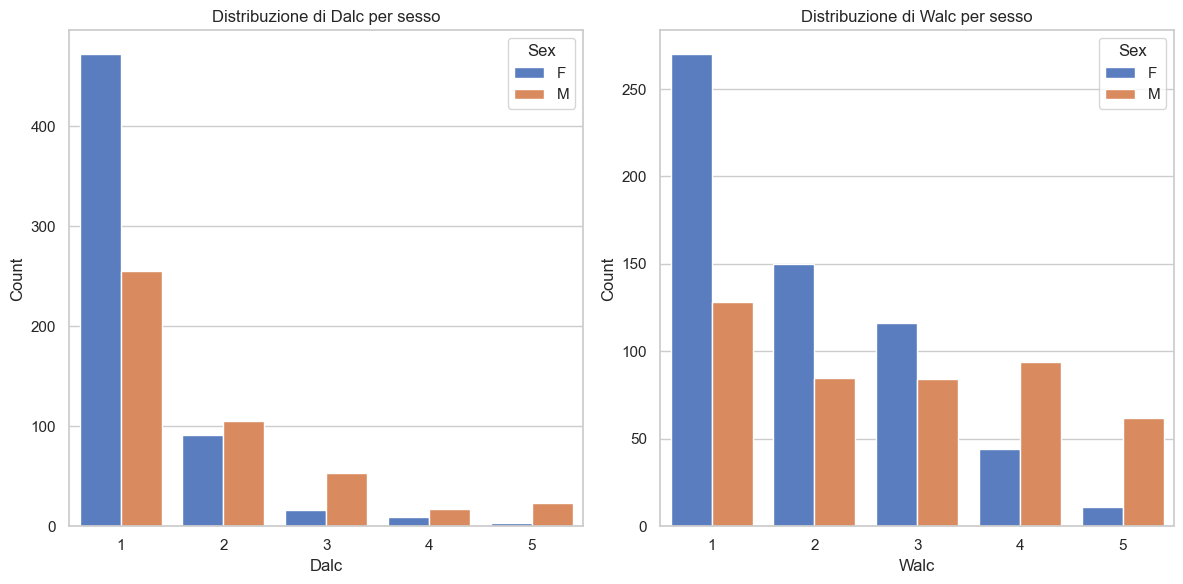

In [32]:
# Imposta lo stile di Seaborn per i grafici
sns.set_theme(style="whitegrid")

# Creare il primo grafico per 'Dalc'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='Dalc', hue='sex', data=full_df, palette='muted')
plt.title('Distribuzione di Dalc per sesso')
plt.xlabel('Dalc')
plt.ylabel('Count')
plt.legend(title='Sex', labels=['F', 'M'])

# Creare il secondo grafico per 'Walc'
plt.subplot(1, 2, 2)
sns.countplot(x='Walc', hue='sex', data=full_df, palette='muted')
plt.title('Distribuzione di Walc per sesso')
plt.xlabel('Walc')
plt.ylabel('Count')
plt.legend(title='Sex', labels=['F', 'M'])

# Mostra i grafici
plt.tight_layout()
plt.show()

In [35]:
mapping["sex"]

{0: 'F', 1: 'M'}

In [48]:
# Creare il primo grafico per 'Dalc'
fig_dalc = px.histogram(full_df, x='Dalc', color='sex', barmode='group',
                        category_orders={'sex': [0, 1]},
                        labels={'sex': 'Sex', 'Dalc': 'Dalc'},
                        title='Distribuzione di Dalc per sesso',
                        color_discrete_map={0: '#a95986', 1: '#0c609c'})

# Modificare le etichette della legenda
fig_dalc.for_each_trace(lambda t: t.update(name=mapping["sex"][int(t.name)]))

# Rimuovere il titolo dell'asse x
fig_dalc.update_xaxes(title_text='')

# Creare il secondo grafico per 'Walc'
fig_walc = px.histogram(full_df, x='Walc', color='sex', barmode='group',
                        category_orders={'sex': [0, 1]},
                        labels={'sex': 'Sex', 'Walc': 'Walc'},
                        title='Distribuzione di Walc per sesso',
                        color_discrete_map={0: '#a95986', 1: '#0c609c'})

# Modificare le etichette della legenda
fig_walc.for_each_trace(lambda t: t.update(name=mapping["sex"][int(t.name)]))

# Rimuovere il titolo dell'asse x
fig_walc.update_xaxes(title_text='')

# Mostra i grafici
fig_dalc.show()
fig_walc.show()

### Alcohol consumption and age


In [50]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 48 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   school             1044 non-null   int64  
 1   sex                1044 non-null   int64  
 2   age                1044 non-null   int64  
 3   address            1044 non-null   int64  
 4   famsize            1044 non-null   int64  
 5   Pstatus            1044 non-null   int64  
 6   Medu               1044 non-null   int64  
 7   Fedu               1044 non-null   int64  
 8   traveltime         1044 non-null   int64  
 9   studytime          1044 non-null   int64  
 10  failures           1044 non-null   int64  
 11  schoolsup          1044 non-null   int64  
 12  famsup             1044 non-null   int64  
 13  paid               1044 non-null   int64  
 14  activities         1044 non-null   int64  
 15  nursery            1044 non-null   int64  
 16  higher             1044 

In [ ]:
# Calcolo della media di consumo di alcol per fascia d'età

dalc_mean_sex = both.groupby('sex')['Dalc'].mean().reset_index
#dalc_mean_g3 = both.groupby('Dalc')['G3'].mean().reset_index()
#walc_mean_g3 = both.groupby('Walc')['G3'].mean().reset_index()


In [ ]:
dalc_mean_sex

In [ ]:

# Creazione dell'istogramma a barre parallele
plt.figure(figsize=(10, 8))
bar_width = 0.3

# Definizione dei colori personalizzati
color_dalc = '#A077b4'
color_walc = '#CC3B57'


# Barre per Dalc
plt.bar(mean_g3['Alcol_Consumo'] - bar_width/2, mean_g3['Media_G3_Dalc'], width=bar_width, label='Dalc', color=color_dalc)

# Barre per Walc
plt.bar(mean_g3['Alcol_Consumo'] + bar_width/2, mean_g3['Media_G3_Walc'], width=bar_width, label='Walc', color=color_walc)

# Aggiunta delle etichette di testo sulle barre
for i in range(len(mean_g3)):
    plt.text(mean_g3['Alcol_Consumo'][i] - bar_width/2, mean_g3['Media_G3_Dalc'][i] + 0.05, round(mean_g3['Media_G3_Dalc'][i], 2), ha='center')
    plt.text(mean_g3['Alcol_Consumo'][i] + bar_width/2, mean_g3['Media_G3_Walc'][i] + 0.05, round(mean_g3['Media_G3_Walc'][i], 2), ha='center')

# Titolo e etichette degli assi
plt.title('Risultati Medi scolastici (G3) per Livello di Consumo di Alcol')
plt.xlabel('Livello di Consumo di Alcol (1-5)')
plt.ylabel('Media G3')
plt.xticks(mean_g3['Alcol_Consumo'])
plt.legend(title='Tipo di Consumo')

# Mostra il grafico
plt.show()


Relazione tra consumo di alcolici e sesso

In [ ]:
# Creazione dell'istogramma a barre parallele
plt.figure(figsize=(10, 8))
bar_width = 0.3

# Definizione dei colori personalizzati
color_dalc = '#A077b4'  # Blu per Dalc
color_walc = '#CC3B57'  # Arancione per Walc

<h2 id="family_rel">Relazioni con la famiglia</h2>

- qual è la qualità delle relazioni familiari?
- relazione tra alcol e genitori separati (Pstatus e Guardian -> controllare)
- Relazione tra lavoro ed educazione dei genitori e uso di alcolici da parte dei figli
- valutare analisi per le seguenti variabili: famsize, famsup, internet

<h2 id="#school_rel">Relazioni con le istituzioni educative</h2>

<h2 id="time_mng">Gestione del tempo</h2>

Valutazione tra la gestiione del tempo e l'uso di alcolici nelle seguenti categorie:

- study time
- free time
- go out
- travel time

<h2 id="conclusions">Conclusioni</h2>

Conclusioni: cosa ci aspettavamo/ci potevamo aspettare di trovare e cosa abbiamo trovato

<h1 id="pred_ana">Data Prediction</h1>

<h2 id="random_forest">Random Forest</h2>

link utili:

<a href="https://www.geeksforgeeks.org/random-forest-regression-in-python/">geeksforgeeks</a>

<a href="https://www.youtube.com/watch?v=QHOazyP-YlM">youtube</a>


<h2 id="SVR">Support Vector Regression</h2>


<a href="https://www.youtube.com/watch?v=kPw1IGUAoY8">youtube</a>

<a href="https://towardsdatascience.com/unlocking-the-true-power-of-support-vector-regression-847fd123a4a0#:~:text=Support%20Vector%20Regression%20is%20a,the%20maximum%20number%20of%20points.">towardsdatascience</a>

<a href="https://www.mathworks.com/help/stats/understanding-support-vector-machine-regression.html">mathworks</a>

<a href="https://www.geeksforgeeks.org/support-vector-regression-svr-using-linear-and-non-linear-kernels-in-scikit-learn/">geeksforgeeks</a>

<h2 id="log_reg">Logistic Regression</h2>

<a href=""></a>
<a href=""></a>
<a href=""></a>

<h2 id="KNN">KNN</h2>

<a href=""></a>
<a href=""></a>
<a href=""></a>

<h2 id="comparison">Confronto</h2>

In [ ]:
dalc_counts = total['Dalc'].value_counts().sort_index()
walc_counts = total['Walc'].value_counts().sort_index()

In [ ]:
# Creazione del grafico a righe per Dalc
plt.figure(figsize=(10, 5))
plt.plot(dalc_counts.index, dalc_counts.values, marker='o', linestyle='-', label='Dalc')
plt.plot(walc_counts.index, walc_counts.values, marker='o', linestyle='-', label='Walc')
plt.title('Conteggio dei valori di Dalc e Walc')
plt.xlabel('Valori di Dalc e Walc')
plt.ylabel('Conteggio')
plt.xticks([1, 2, 3, 4, 5])
plt.legend()
plt.grid(False)
plt.show()

In [ ]:
# Contare la frequenza dei valori univoci di Dalc
dalc_counts = total['Dalc'].value_counts().sort_index().reset_index()
dalc_counts.columns = ['Value', 'Count']
dalc_counts['Type'] = ('workday - Dalc')

In [ ]:
# Contare la frequenza dei valori univoci di Walc
walc_counts = total['Walc'].value_counts().sort_index().reset_index()
walc_counts.columns = ['Value', 'Count']
walc_counts['Type'] = 'weekend - Walc'

In [ ]:
combined_counts = pd.concat([dalc_counts, walc_counts])

In [ ]:
# Creare il grafico interattivo con Plotly
fig = px.line(combined_counts, x='Value', y='Count', color='Type', markers=True,
              labels={'Value': 'Valori di Dalc e Walc', 'Count': 'Conteggio'},
              title='Numero studenti per consumo di alcol (1-low 5-high), \ndurante la settimana (Dalc) e nel weekend(Walc)')

# Aggiungere hover data per visualizzare il conteggio totale
fig.update_traces(mode='markers+lines', hovertemplate='%{y}')

# Mostrare il grafico
fig.show()

In [ ]:
# Creare la figura
fig = go.Figure()

# Aggiungere le barre per Dalc
fig.add_trace(go.Bar(
    y=dalc_counts.index,
    x=dalc_counts.values,
    name='Dalc',
    orientation='h',
    marker=dict(color='blue')
))

# Aggiungere le barre per Walc
fig.add_trace(go.Bar(
    y=walc_counts.index,
    x=walc_counts.values,
    name='Walc',
    orientation='h',
    marker=dict(color='orange')
))

# Aggiornare il layout per le barre parallele
fig.update_layout(
    barmode='group',
    title='Conteggio dei valori di Dalc e Walc',
    xaxis_title='Conteggio',
    yaxis_title='Valori di Dalc e Walc',
    legend_title_text='Tipo di Consumo',
    legend=dict(
        x=0.01,  # posizione orizzontale della legenda
        y=0.99,  # posizione verticale della legenda
        traceorder='normal',
        font=dict(
            family='Arial',
            size=12,
            color='black'
        ),
        bgcolor='LightSteelBlue',
        bordercolor='Black',
        borderwidth=2
    )
)

# Aggiungere hover data per visualizzare il conteggio totale
fig.update_traces(hovertemplate='Conteggio: %{x}')

# Mostrare il grafico
fig.show()

In [ ]:


# Calcolare la media di Dalc per ciascuna fascia d'età
age_dalc_mean = total.groupby('age')['Dalc'].mean().reset_index()

# Creare il grafico a barre
fig = px.bar(age_dalc_mean, x='age', y='Dalc', 
             labels={'age': 'Età', 'Dalc': 'Consumo medio di alcol nei giorni lavorativi'},
             title='Consumo medio di alcol nei giorni lavorativi per fascia d\'età')

# Aggiungere hover data per visualizzare il consumo medio di alcol
fig.update_traces(hovertemplate='Età: %{x}<br>Consumo medio: %{y}')

# Personalizzare il layout
fig.update_layout(
    xaxis=dict(tickmode='linear'),
    yaxis=dict(range=[0, 5]),  # Imposta il range dell'asse y da 0 a 5
    bargap=0.2,  # Spazio tra le barre
    plot_bgcolor='rgba(0,0,0,0)',  # Sfondo trasparente
    title_x=0.5,  # Centra il titolo
)

# Mostrare il grafico
fig.show()
